In [1]:
%matplotlib inline
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import nltk
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text
import pickle
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

In [2]:
def stem_words(doc):
    stemmed_doc = ''
    for w in doc.split(' '):
        stemmed_doc += stemmer.stem(w) + ' '
    return stemmed_doc

In [5]:
data = []
for sermon in os.listdir('../sermons/preachingtoday'):
    f=open('../sermons/preachingtoday/'+ sermon, 'rb')
    contents =f.read()
    contents = json.loads(contents)
    data.append(contents["summary"])

In [7]:
def top_terms(num_clusters):
    result = []
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vect.get_feature_names()
    for i in range(num_clusters):
        top_words = ''
        for ind in order_centroids[i, 0:7]:
            top_words += '/' + str(terms[ind])
        result.append(top_words)
    return result

In [8]:
def get_label_indicies(num, the_array):
    result = []
    for label in range(0, num):
        indicies = []
        count = 0
        for i in the_array:
            if i == label:
                indicies.append(count)
            count +=1
        result.append(indicies)
    return result

In [9]:
print('Vectorizing')
extra_stop_words = []#['god', 'man', 'christ', 'jesus', 'shall', 'love', 'life','men', 'lord']
my_stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)
vect = TfidfVectorizer(stop_words = my_stop_words, max_df = .2,ngram_range = {1,3})
corpus = vect.fit_transform(data)

Vectorizing


c:\users\zach dunkerton\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [10]:
print('Kmeans')
kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100).fit(corpus)
transformed = kmeans.transform(corpus)
print('TSNE')
two_d_data = TSNE(n_components=2).fit_transform(transformed)

Kmeans
PCA


In [11]:
legend = top_terms(7)

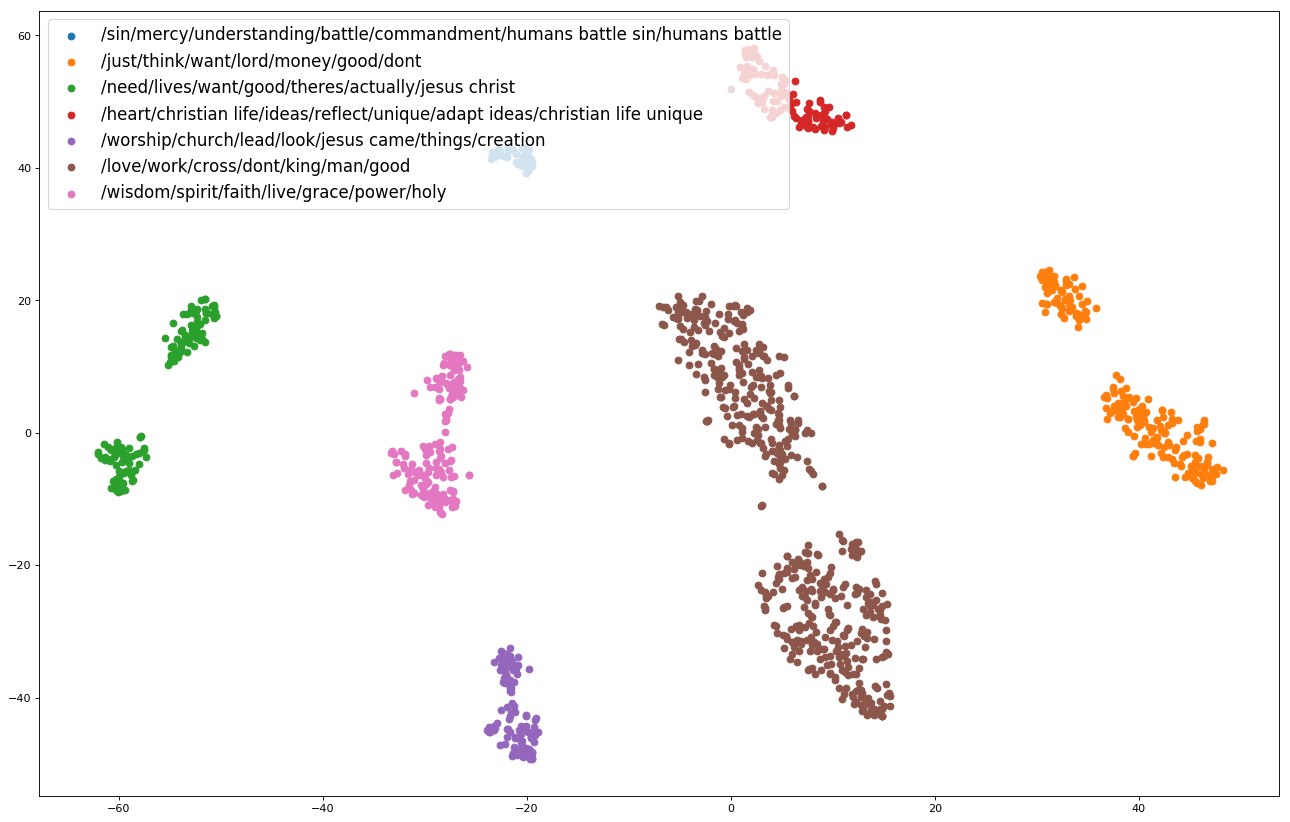

In [12]:
labels = get_label_indicies(7, kmeans.labels_)
fig = plt.figure(figsize=(20, 13), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)

i = 0
for l in labels:
    ax1.scatter(two_d_data[l][:,0],two_d_data[l][:,1], label = legend[i])
    i+=1

#ax1.scatter(kyle[:, 0], kyle[:, 1], c='b', marker = 'x')
plt.legend(prop={'size': 15})
plt.show()
